## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#importing pandas to read csv file
# Your code here - remember to use markdown cells for comments as well!

In [2]:
kcdf = pd.read_csv('../data/kc_house_data.csv')
#dataset

In [3]:
kcdf = kcdf.drop(columns = ['date','sqft_above','sqft_basement', 'yr_renovated'])

In [4]:
kcdf = kcdf.dropna()

In [5]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,330.475308,217.451264,1975.162299,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,285.725020,245.301991,32.052930,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,1953.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,400.000000,150.000000,1977.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,510.000000,320.000000,2003.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,2022.000000,64.824070,-70.074340


In [6]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30111 non-null  int64  
 1   price         30111 non-null  float64
 2   bedrooms      30111 non-null  int64  
 3   bathrooms     30111 non-null  float64
 4   sqft_living   30111 non-null  int64  
 5   sqft_lot      30111 non-null  int64  
 6   floors        30111 non-null  float64
 7   waterfront    30111 non-null  object 
 8   greenbelt     30111 non-null  object 
 9   nuisance      30111 non-null  object 
 10  view          30111 non-null  object 
 11  condition     30111 non-null  object 
 12  grade         30111 non-null  object 
 13  heat_source   30111 non-null  object 
 14  sewer_system  30111 non-null  object 
 15  sqft_garage   30111 non-null  int64  
 16  sqft_patio    30111 non-null  int64  
 17  yr_built      30111 non-null  int64  
 18  address       30111 non-nu

In [7]:
kcdf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,address,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,Good,7 Average,Gas,PUBLIC,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,Average,7 Average,Oil,PUBLIC,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,Average,7 Average,Gas,PUBLIC,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,Average,9 Better,Gas,PUBLIC,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,Average,7 Average,Electricity,PUBLIC,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [8]:
am_cords = (47.615722, -122.339494)

In [9]:
kcdf['location'] = list(zip(kcdf.lat, kcdf.long))

In [10]:
kcdf['distance_to_amazon'] = kcdf['location'].apply(lambda x: geodesic(x, am_cords).miles)

In [11]:
closekcdf = kcdf[kcdf['distance_to_amazon'] <= 10]

In [12]:
closekcdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,address,lat,long,location,distance_to_amazon
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,Oil,PUBLIC,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,"(47.711525, -122.35591)",6.662879
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,Gas,PUBLIC,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,"(47.502045, -122.2252)",9.499631
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,Gas,PUBLIC,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,"(47.56611, -122.2902)",4.129763
10,3726800276,1025000.0,3,1.5,2570,6379,1.5,NO,NO,YES,...,Oil,PUBLIC,0,250,1912,"3408 Beacon Avenue South, Seattle, Washington ...",47.572760,-122.30820,"(47.57276, -122.3082)",3.308790
15,5540800120,1500000.0,4,2.5,1980,5100,2.0,NO,NO,NO,...,Gas,PUBLIC,0,0,1944,"927 North 91st Street, Seattle, Washington 981...",47.694690,-122.34601,"(47.69469, -122.34601)",5.464078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,3277800805,725000.0,3,1.0,1680,3249,1.5,NO,NO,NO,...,Oil,PUBLIC,240,0,1929,"6324 34th Avenue Southwest, Seattle, Washingto...",47.545935,-122.37480,"(47.545935, -122.3748)",5.095905
30149,9376300851,719000.0,3,2.5,1270,1141,2.0,NO,NO,NO,...,Gas,PUBLIC,200,60,2007,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.37062,"(47.69044, -122.37062)",5.362576
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,Oil,PUBLIC,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,"(47.66474, -122.3294)",3.419102
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,Gas,PUBLIC,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,"(47.56561, -122.38851)",4.151298


In [13]:
q1 = closekcdf['price'].quantile(.25)
q3 = closekcdf['price'].quantile(.75)
IQR = q3 - q1
outliers = closekcdf[((closekcdf['price']<(q1-1.5*IQR)) | (closekcdf['price']>(q3+1.5*IQR)))]

In [14]:
outliers

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,address,lat,long,location,distance_to_amazon
27,5424700190,4500000.0,4,3.0,2760,13150,1.5,NO,NO,NO,...,Oil,PUBLIC,0,160,1954,"8637 Northeast 6th Street, Medina, Washington ...",47.615710,-122.223990,"(47.61571, -122.22399)",5.395579
118,5425700191,3000000.0,3,1.5,2040,14284,1.0,NO,NO,NO,...,Oil,PUBLIC,400,0,1952,"2539 82nd Avenue Northeast, Medina, Washington...",47.633020,-122.232570,"(47.63302, -122.23257)",5.134951
130,5317100105,4424080.0,4,3.5,2940,7200,2.0,NO,NO,NO,...,Gas,PUBLIC,0,100,1925,"1115 41st Avenue East, Seattle, Washington 981...",47.629070,-122.280365,"(47.62907, -122.280365)",2.911650
131,9413900071,2875000.0,3,4.5,5450,20289,1.0,NO,NO,NO,...,Gas,PUBLIC,720,840,1962,"10501 Northeast 47th Place, Kirkland, Washingt...",47.652365,-122.200315,"(47.652365, -122.200315)",6.974867
140,1651600020,6438000.0,5,4.5,6110,21562,2.0,NO,NO,NO,...,Gas,PUBLIC,800,580,2020,"2659 90th Avenue Northeast, Clyde Hill, Washin...",47.635230,-122.221695,"(47.63523, -122.221695)",5.664429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29982,8086600025,2910000.0,3,1.5,1490,12390,1.0,NO,NO,NO,...,Oil,PUBLIC,480,0,1955,"9825 Northeast 22nd Street, Bellevue, Washingt...",47.629950,-122.208700,"(47.62995, -122.2087)",6.187571
30083,1860600140,3395000.0,4,4.5,4390,5300,3.0,NO,NO,NO,...,Gas,PUBLIC,500,950,1991,"1624 8th Avenue West, Seattle, Washington 9811...",47.634320,-122.367305,"(47.63432, -122.367305)",1.827032
30106,7588700215,2875000.0,3,2.0,1900,8800,1.0,NO,NO,NO,...,Oil,PUBLIC,200,80,1953,"8322 16th Avenue Northwest, Seattle, Washingto...",47.689410,-122.377560,"(47.68941, -122.37756)",5.392036
30126,1087500050,3754500.0,4,5.5,5200,10790,2.0,NO,NO,NO,...,Gas,PUBLIC,730,400,2021,"12237 Northeast 66th Street, Kirkland, Washing...",47.664625,-122.175870,"(47.664625, -122.17587)",8.353552


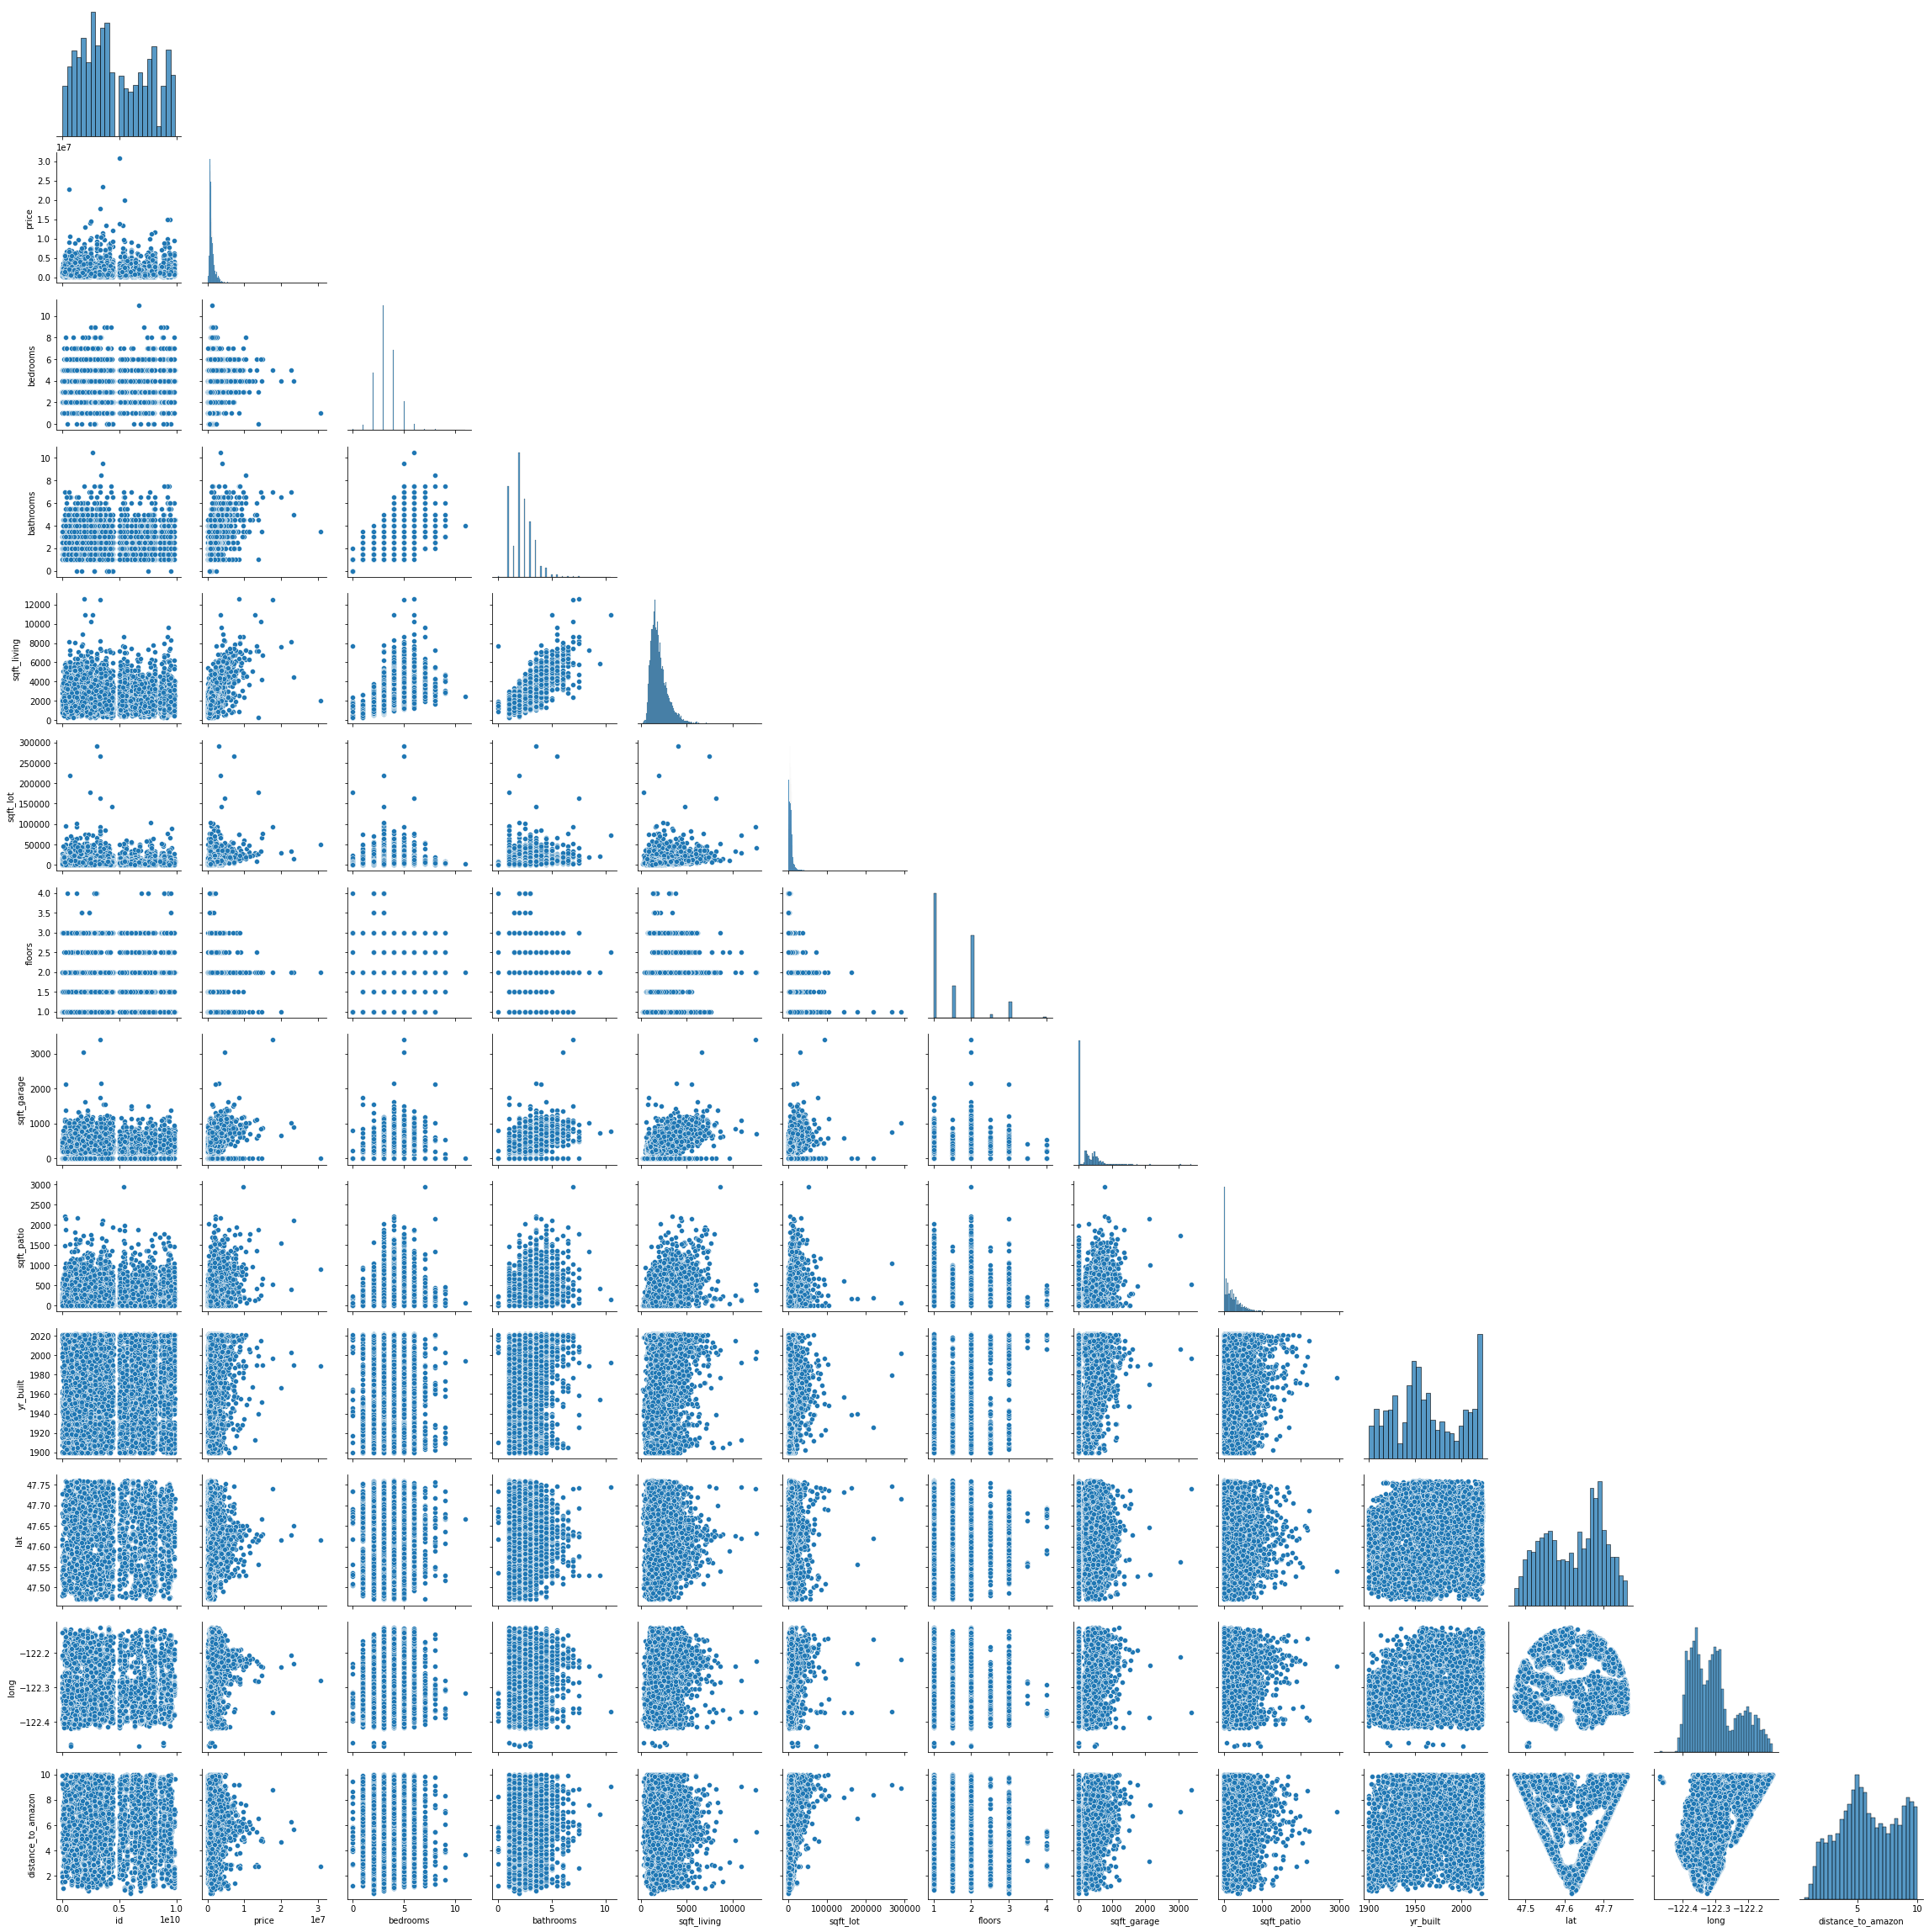

In [15]:
sns.pairplot(closekcdf, corner = True)

<AxesSubplot:>

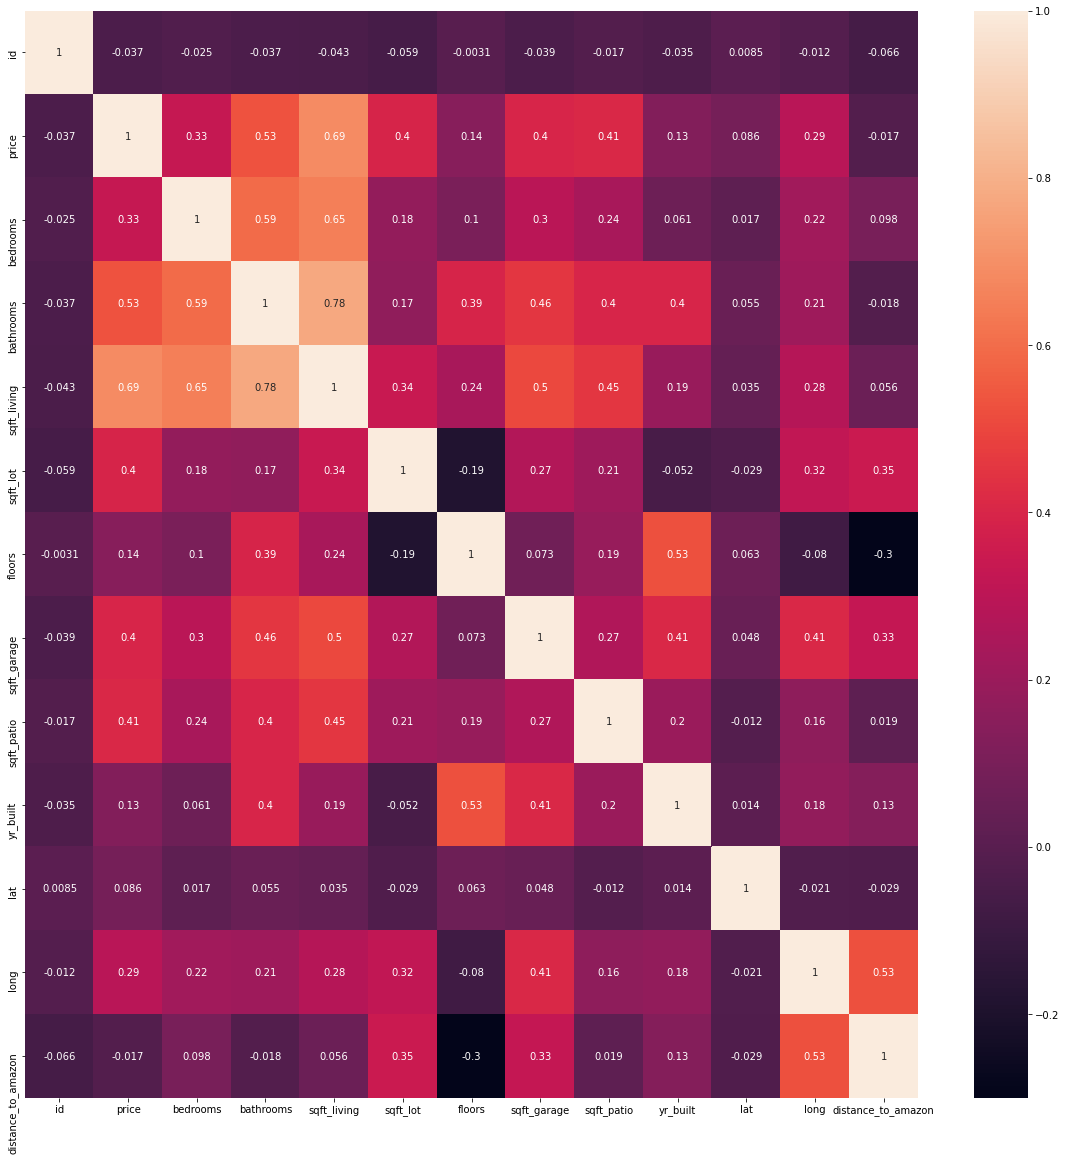

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(closekcdf.corr(), annot = True)

In [17]:
x = closekcdf[['sqft_living', 'floors', 'sqft_lot', 'sqft_garage', 'sqft_patio','lat', 'long', 'yr_built', 'distance_to_amazon',]]
y = closekcdf['price']
results = sm.OLS(y, sm.add_constant(x)).fit()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1841.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        17:18:00   Log-Likelihood:            -1.9863e+05
No. Observations:               13303   AIC:                         3.973e+05
Df Residuals:                   13293   BIC:                         3.974e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.626e+08   1.46e+07     18.000      0.000    2.34e+08    2.91e+08
sqft_living          562.7807      8.611     65.355      0.000     545.902     579.660
floors             -5.015e+04   1.46e+04     -3.444      0.001   -7.87e+04   -2.16e+04
sqft_lot              29.1537      0.944     30.880      0.000      27.303      31.004
sqft_garage          268.9339     34.094      7.888      0.000     202.105     335.763
sqft_patio           445.7499     31.110     14.328      0.000     384.770     506.730
lat                 1.042e+06   8.59e+04     12.132      0.000    8.73e+05    1.21e+06
long                2.553e+06   1.15e+05     22.197      0.000    2.33e+06    2.78e+06
yr_built             303.1616    246.970      1.228      0.220    -180.934     787.257
distance_to_amazon  -1.07e+05   3535.993    -30.268      0.000   -1.14e+05      -1e+05
==============================================================================
Omnibus:                    20151.426   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30211626.824
Skew:                           8.941   Prob(JB):                         0.00
Kurtosis:                     235.777   Cond. No.                     2.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
closekcdf['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '10 Very Good', '5 Fair',
       '6 Low Average', '11 Excellent', '12 Luxury', '13 Mansion',
       '4 Low', '3 Poor'], dtype=object)

In [20]:
closekcdf['condition'].unique()

array(['Average', 'Good', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [21]:
grade_list = ['3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [22]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(closekcdf[['grade', 'condition', 'view']]), columns = closekcdf[['grade', 'condition', 'view']].columns)

In [23]:
new_kcdf = pd.concat([closekcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [24]:
new_kcdf

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,address,lat,long,location,distance_to_amazon,grade,condition,view
0,1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,"(47.711525, -122.35591)",6.662879,4.0,2.0,2.0
1,2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,"(47.502045, -122.2252)",9.499631,4.0,2.0,2.0
2,3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,"(47.56611, -122.2902)",4.129763,6.0,2.0,2.0
3,10,3726800276,1025000.0,3,1.5,2570,6379,1.5,NO,NO,...,250,1912,"3408 Beacon Avenue South, Seattle, Washington ...",47.572760,-122.30820,"(47.57276, -122.3082)",3.308790,4.0,2.0,0.0
4,15,5540800120,1500000.0,4,2.5,1980,5100,2.0,NO,NO,...,0,1944,"927 North 91st Street, Seattle, Washington 981...",47.694690,-122.34601,"(47.69469, -122.34601)",5.464078,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13298,30143,3277800805,725000.0,3,1.0,1680,3249,1.5,NO,NO,...,0,1929,"6324 34th Avenue Southwest, Seattle, Washingto...",47.545935,-122.37480,"(47.545935, -122.3748)",5.095905,4.0,2.0,0.0
13299,30149,9376300851,719000.0,3,2.5,1270,1141,2.0,NO,NO,...,60,2007,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.37062,"(47.69044, -122.37062)",5.362576,5.0,2.0,0.0
13300,30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,"(47.66474, -122.3294)",3.419102,5.0,3.0,0.0
13301,30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,"(47.56561, -122.38851)",4.151298,4.0,2.0,1.0


In [25]:
x = new_kcdf[['sqft_living', 'floors', 'sqft_lot', 'sqft_garage', 'sqft_patio','lat', 'long', 'yr_built', 'distance_to_amazon','grade','condition', 'view']]
y = new_kcdf['price']
results = sm.OLS(y, sm.add_constant(x)).fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1584.
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        17:18:00   Log-Likelihood:            -1.9811e+05
No. Observations:               13303   AIC:                         3.962e+05
Df Residuals:                   13290   BIC:                         3.963e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.612e+08   1.41e+07     18.482      0.000    2.34e+08    2.89e+08
sqft_living          408.4942     10.044     40.669      0.000     388.806     428.182
floors             -8.987e+04   1.43e+04     -6.290      0.000   -1.18e+05   -6.19e+04
sqft_lot              25.9065      0.914     28.355      0.000      24.116      27.697
sqft_garage          133.5582     33.257      4.016      0.000      68.370     198.746
sqft_patio           233.7968     30.633      7.632      0.000     173.752     293.842
lat                 1.002e+06   8.34e+04     12.011      0.000    8.38e+05    1.17e+06
long                2.513e+06   1.12e+05     22.382      0.000    2.29e+06    2.73e+06
yr_built            -918.3975    258.349     -3.555      0.000   -1424.798    -411.997
distance_to_amazon -8.156e+04   3562.562    -22.895      0.000   -8.85e+04   -7.46e+04
grade               2.009e+05   9817.560     20.460      0.000    1.82e+05     2.2e+05
condition           1.183e+04   9079.876      1.302      0.193   -5972.746    2.96e+04
view                1.635e+05   7342.514     22.262      0.000    1.49e+05    1.78e+05
==============================================================================
Omnibus:                    20407.513   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32534931.629
Skew:                           9.162   Prob(JB):                         0.00
Kurtosis:                     244.579   Cond. No.                     2.51e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [28]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system']

In [29]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [30]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names())

In [31]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system']), nominal_df],1)

In [32]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  13303 non-null  int64  
 1   id                     13303 non-null  int64  
 2   price                  13303 non-null  float64
 3   bedrooms               13303 non-null  int64  
 4   bathrooms              13303 non-null  float64
 5   sqft_living            13303 non-null  int64  
 6   sqft_lot               13303 non-null  int64  
 7   floors                 13303 non-null  float64
 8   nuisance               13303 non-null  object 
 9   sqft_garage            13303 non-null  int64  
 10  sqft_patio             13303 non-null  int64  
 11  yr_built               13303 non-null  int64  
 12  address                13303 non-null  object 
 13  lat                    13303 non-null  float64
 14  long                   13303 non-null  float64
 15  lo

In [33]:
cleandf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13298    False
13299    False
13300    False
13301    False
13302    False
Length: 13303, dtype: bool

In [34]:
lr = LinearRegression()

In [35]:
col_select = ['sqft_living', 'floors', 'sqft_lot', 'sqft_garage', 'sqft_patio','lat', 'long', 'yr_built', 'distance_to_amazon','grade', 'condition', 'view', 'x0_NO','x0_YES', 'x1_NO', 'x1_YES', 'x2_Electricity','x2_Electricity/Solar', 'x2_Gas', 'x2_Gas/Solar', 'x2_Oil', 'x2_Oil/Solar', 'x2_Other', 'x3_PRIVATE', 'x3_PRIVATE RESTRICTED', 'x3_PUBLIC', 'x3_PUBLIC RESTRICTED']
X = cleandf[col_select]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
lr.score(X_train, y_train)

0.6285700979100185

In [40]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([2625844.37651607, 1204187.42245743,  570698.98604596,
        405369.2193175 ,  975315.51258397, 1969039.84637493,
       1082727.49444181,  926621.10816121,  762000.99961081,
       1759351.96558699])

In [41]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

343982.5219444189